In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
cd gdrive/My Drive

In [0]:
cd dataset_mini

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [0]:
train = pd.read_csv('train.csv')
submission = pd.read_csv('test.csv')

In [0]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
y_train = train['label']
X_train = train.drop('label', axis=1)
X_submission = submission

In [0]:
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [0]:
X_train.head()

In [0]:

X_submission.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

print(pca.explained_variance_ratio_)

[0.09748938 0.07160266]


In [0]:
print(X_train.shape)
print(pca_result.shape)

(42000, 784)
(42000, 2)


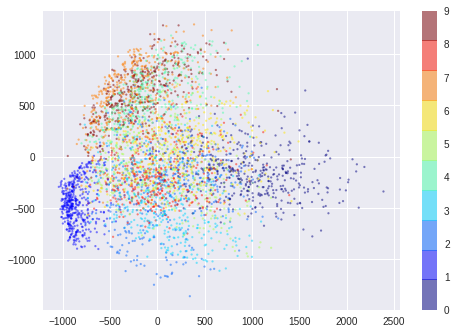

In [0]:
plt.scatter(pca_result[:4000, 0], pca_result[:4000, 1], c=y_train[:4000], edgecolor='none', alpha=0.5,
           cmap=plt.get_cmap('jet', 10), s=5)
plt.colorbar()

Text(0, 0.5, 'Cumulative explained variance')

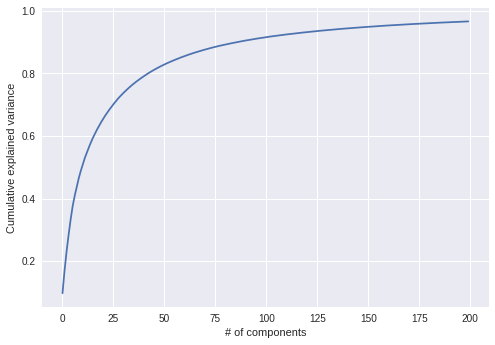

In [0]:
pca = PCA(200)
pca_full = pca.fit(X_train)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('Cumulative explained variance')

In [0]:
pca = PCA(n_components=50)
X_train_transformed = pca.fit_transform(X_train)
X_submission_transformed = pca.transform(X_submission)


In [0]:
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split( 
    X_train_transformed, y_train, test_size=0.2, random_state=13)

In [0]:
components = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9]

scores = np.zeros( (components[len(components)-1]+1, neighbors[len(neighbors)-1]+1 ) )

In [0]:
from sklearn.neighbors import KNeighborsClassifier

for component in components:
    for n in neighbors:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train_pca[:,:component], y_train_pca)
        score = knn.score(X_test_pca[:,:component], y_test_pca)
        predict = knn.predict(X_test_pca[:,:component])
        scores[component][n] = score
        
        print('Components = ', component, ', neighbors = ', n,', Score = ', score) 

Components =  5 , neighbors =  1 , Score =  0.6834523809523809
Components =  5 , neighbors =  2 , Score =  0.670952380952381
Components =  5 , neighbors =  3 , Score =  0.7113095238095238
Components =  5 , neighbors =  4 , Score =  0.7233333333333334
Components =  5 , neighbors =  5 , Score =  0.7301190476190477
Components =  5 , neighbors =  6 , Score =  0.7353571428571428
Components =  5 , neighbors =  7 , Score =  0.7394047619047619
Components =  5 , neighbors =  8 , Score =  0.7426190476190476
Components =  5 , neighbors =  9 , Score =  0.7461904761904762
Components =  10 , neighbors =  1 , Score =  0.9104761904761904
Components =  10 , neighbors =  2 , Score =  0.905952380952381
Components =  10 , neighbors =  3 , Score =  0.92
Components =  10 , neighbors =  4 , Score =  0.9213095238095238
Components =  10 , neighbors =  5 , Score =  0.9226190476190477
Components =  10 , neighbors =  6 , Score =  0.9220238095238096
Components =  10 , neighbors =  7 , Score =  0.9205952380952381
C

In [0]:
predict

array([4, 3, 2, ..., 3, 7, 1])

In [0]:
scores = np.reshape(scores[scores != 0], (len(components), len(neighbors)))

x = [0, 1, 2, 3, 4, 5, 6]
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

plt.rcParams["axes.grid"] = False

fig, ax = plt.subplots()
plt.imshow(scores, cmap='hot', interpolation='none', vmin=.90, vmax=1)
plt.xlabel('neighbors')
plt.ylabel('components')
plt.xticks(x, neighbors)
plt.yticks(y, components)
plt.title('KNN score heatmap')

plt.colorbar()
plt.show()

In [0]:
#X_submission_transformed[:, :]

In [0]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca[:, :35], y_train_pca)

predict_labels = knn.predict(X_submission_transformed[:, :35])
print(predict_labels)

[2]


In [0]:
predict_labels

array([2])

In [0]:
Submission = pd.DataFrame({
        "ImageId": range(1, predict_labels.shape[0]+1),
        "Label": predict_labels
    })

Submission.to_csv("KnnMnistSubmission.csv", index=False)

Submission.head(5)

,ImageId,Label
0,1,2


In [0]:

from PIL import Image

img = Image.open('img_1.jpg').convert('L') # convert image to 8-bit grayscale
WIDTH, HEIGHT = img.size

data = list(img.getdata()) # convert image data to a list of integers
# convert that to 2D list (list of lists of integers)
data = [data[offset:offset+WIDTH] for offset in range(0, WIDTH*HEIGHT, WIDTH)]

# At this point the image's pixels are all in memory and can be accessed
# individually using data[row][col].

# For example:
x = list()
for row in data:
  #y = list()
  for value in row:
    x.append(value)
  #x.append(y)  
    #print(' '.join('{:3}'.format(value) for value in row))
     
    
    



In [0]:
#x = list()
for row in data:
    print(' '.join('{:3}'.format(value) for value in row))


  0   0   0   0   0   0   0   0   0   1   3   0   0   4   2   0  11   0   0  14   1   0  19   0   0   0   0   0
  0   0   0   0   0   0   0   0   0  12   0   0   7   0   1  10   0   2   2  16   0   3   3   0   0   0   0   0
  0   0   0   0   0   0   0   0   7   8   0   8   0   0   8   0   0  19   0   0   1  21   0   4   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   1   0   0   1   0   0   0   0   0  11   0   0  10   3   0   0   0   0
  0   0   0   0   0   0   0   0  13   0  15  10  26  34  17  77 181 178  35   4   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0 150 254 250 251 243 252 252 255  45   6   0   5   0   9   0   0   0   0
  0   0   0   0   0   0   0   0   7  72 205 255 238 243 255 254 251 248 201 198  57   0  19   0   0   0   0   0
  0   0   0   0   0   0   0   0   0 218 255 241 255 249 250 251 250 255 255 242 224  49   0  12   0   0   0   0
  0   0   1   2   3   2   2   1   0  65 228 255 254 244 119  34  41 110 250 255 248 124  20   0   0   0 

In [0]:
data = pd.read_csv('done.csv')

for i in range(784):
  s = 'pixel'+ str(i)
  #print(s, x[i])
  data.set_value(0, s, x[i])
  #data[s] = x[i]
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
